In [449]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [450]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [451]:
df.head()

,type,msg,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [452]:
df.shape

(5572, 5)

I.DATA CLEANING

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        5572 non-null   object
 1   msg         5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [454]:
#since last 3 coloumns have very few values in comparision to first two drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [455]:
df.sample(5)

,type,msg
1273,spam,network operator. The service is free. For T &...
2094,spam,PRIVATE! Your 2004 Account Statement for 07742...
2300,ham,Nothin comes to my mind. ÌÏ help me buy hanger...
3785,ham,Wat r u doing?
1332,ham,It's ok lar. U sleep early too... Nite...


In [456]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [457]:
df['type']=encoder.fit_transform(df['type'])

In [458]:
df.sample(5)

,type,msg
360,0,Ha ha cool cool chikku chikku:-):-DB-)
4957,0,Why didn't u call on your lunch?
2824,1,Congratulations - Thanks to a good friend U ha...
3266,0,Ok then i come n pick u at engin?
165,0,I place all ur points on e cultures module alr...


In [459]:
#checking for missing values
df.isnull().sum()

type    0
msg     0
dtype: int64

In [460]:
#check for duplicate values
df.duplicated().sum()

403

In [461]:
df=df.drop_duplicates(keep='first')

In [462]:
df.duplicated().sum()

0

In [463]:
df.shape

(5169, 2)

II. EDA

In [464]:
#check distribution of sapm and ham/real msg 0-->ham  1-->spam
df['type'].value_counts()

0    4516
1     653
Name: type, dtype: int64

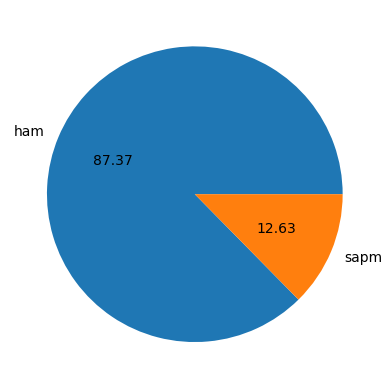

In [465]:
#represent it graphically
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','sapm'],autopct="%0.2f")
plt.show()

In [466]:
#Data is imbalanced ham is huge
import nltk

In [467]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [468]:
#length in terms of characters used in that sentence
df['num_characters']=df['msg'].apply(len)

In [469]:
df.sample(5)

,type,msg,num_characters
3080,0,Have a great trip to India. And bring the ligh...,147
3329,0,Send me yetty's number pls.,27
2707,1,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...,160
5081,0,\HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VI...,119
68,1,"Did you hear about the new \Divorce Barbie\""? ...",80


In [470]:
#fetch the number of words length
df['num_words']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [471]:
df.sample(4)

,type,msg,num_characters,num_words
4088,0,"How are you, my Love ? Are you with your broth...",147,35
4075,1,87077: Kick off a new season with 2wks FREE go...,114,27
4469,0,"Lemme know when I can swing by and pick up, I'...",97,23
3330,0,How much it will cost approx . Per month.,41,10


In [472]:
#fetch the number of sentences length
df['num_sentences']=df['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [473]:
df.head()

,type,msg,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [474]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [475]:
#description of msg on the basis of ham
df[df['type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [476]:
#description of msg on the basis of spam
df[df['type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

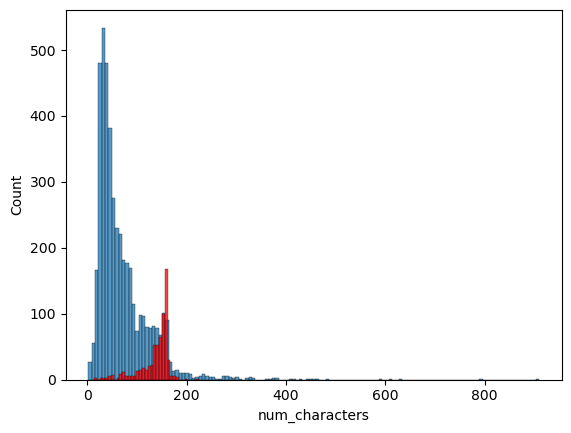

In [477]:
#to graphically understand the difference in msg
import seaborn as sns
sns.histplot(df[df['type']==0]['num_characters'])
sns.histplot(df[df['type']==1]['num_characters'],color='red')

# as we can observe that most of ham/real message are of 0 to 150 characters whereas
#spam most msg range from 160-190 characters approx

<AxesSubplot:>

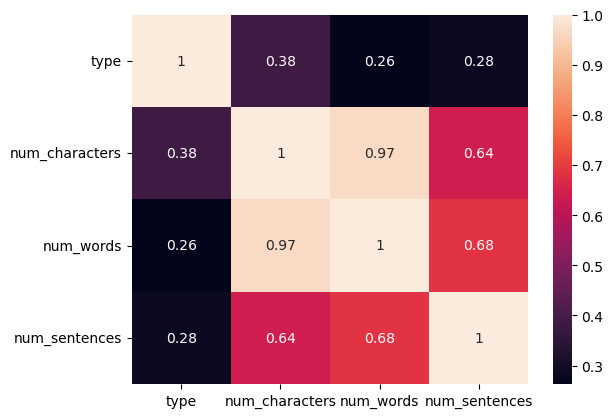

In [478]:
sns.heatmap(df.corr(),annot=True)
#since num words,char and sentences have high collinearity we chose only one 

III DATA PREPROCESSING

In [479]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [480]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [481]:
transform_text('HI GOOD BAD SAD Lopez %^*&&* IS ARE.Are you a funny person')

'hi good bad sad lopez funni person'

In [482]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [483]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('talking')

'talk'

In [484]:
df['transformed_text']=df['msg'].apply(transform_text)

In [485]:
df.sample(5)

,type,msg,num_characters,num_words,num_sentences,transformed_text
4688,0,"Didn't try, g and I decided not to head out",43,12,1,tri g decid head
184,0,Going on nothing great.bye,26,4,1,go noth
4497,1,Latest Nokia Mobile or iPOD MP3 Player +å£400 ...,125,21,3,latest nokia mobil ipod mp3 player proze guara...
396,0,Was actually sleeping and still might when u c...,118,30,4,actual sleep still might u call back text gr8 ...
481,0,"Yo carlos, a few friends are already asking me...",90,20,1,yo carlo friend alreadi ask work weekend


In [486]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [487]:
#word cloud of msg
# visual representations of text data where the size of each word corresponds to its frequency or importance within the text.
#to understand which words are mostly used in spam and real message

from wordcloud import WordCloud
wc=WordCloud(width=600,min_font_size=15,height=600,background_color='black')

In [488]:
spam_wc=wc.generate(df[df['type']==1]['transformed_text'].str.cat(sep=" "))

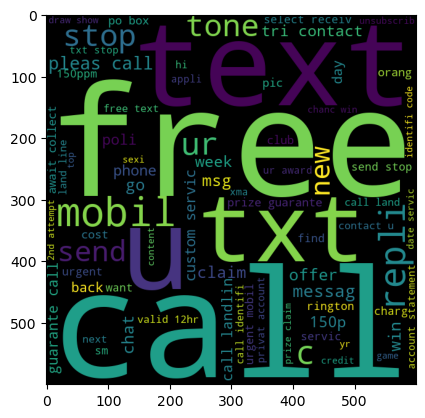

In [489]:
plt.imshow(spam_wc)

In [490]:
ham_wc=wc.generate(df[df['type']==0]['transformed_text'].str.cat(sep=" "))

IV. MODEL BUILDING ON NAIVE BAYES AS TEXTUAL DATA

In [491]:
#bag of words vectorization for textual data to numerical form

In [492]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [493]:
#since cv didnot gave a higher precision we use tfidf to check if there is a higher precision
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [494]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [495]:
Y=df['type'].values

In [496]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [497]:
from sklearn.model_selection import train_test_split

In [498]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [499]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [500]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [501]:
gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [502]:
mnb.fit(X_train,Y_train)
Y_pred1=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

#highest precision is obtained in mnb when tfidf is used.....in email spam we care more about precision(i.e. spam lai ham ra ham lai spam nabhanne)

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [503]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [504]:
#choose tfidf----->multinomial nbayes
#to check if any other ML models perform better than naive bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [505]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


In [506]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
}

In [507]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [508]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


In [509]:
#improve model if we can
#when max features=3000 Naive bayes accuracy increases to 97 which is better than the original

In [510]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))